## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from latexify import latexify, format_axes
from watermark  import watermark

### Print package versions

In [2]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib -d

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

numpy     : 1.26.4
pandas    : 2.2.2
matplotlib: 3.9.1



## Loading Treaining Data

In [3]:
X_train = np.load("Saved_Dataset/X_train.npy")
y_train = np.load("Saved_Dataset/y_train.npy")

## Basic EDA

In [4]:
print(X_train.shape , y_train.shape)

(126, 500, 3) (126,)


X_train: (126, 500, 3)

126 samples <br>
500 time steps <br>
3 features per time step <br>
y_train: (126,) <br>
<br>
126 labels (one for each sample)

In [5]:
# Reshape X_train from (126, 500, 3) to (126, 1500) where 1500 is the product of 500 time steps and 3 features.
num_samples, num_time_steps, num_features = X_train.shape
X_train_flat = X_train.reshape(num_samples, num_time_steps * num_features)

In [6]:
print(X_train_flat.shape)

(126, 1500)


In [7]:
feature_names = [
    f"Sensor{sensor+1}_Timestep{time_step+1}" 
    for sensor in range(num_features) 
    for time_step in range(num_time_steps)
]
print(len(feature_names))

1500


In [8]:
# Features dataframe
df_X_train = pd.DataFrame(X_train_flat, columns=feature_names)
display(df_X_train)

,Sensor1_Timestep1,Sensor1_Timestep2,Sensor1_Timestep3,Sensor1_Timestep4,Sensor1_Timestep5,Sensor1_Timestep6,Sensor1_Timestep7,Sensor1_Timestep8,Sensor1_Timestep9,Sensor1_Timestep10,...,Sensor3_Timestep491,Sensor3_Timestep492,Sensor3_Timestep493,Sensor3_Timestep494,Sensor3_Timestep495,Sensor3_Timestep496,Sensor3_Timestep497,Sensor3_Timestep498,Sensor3_Timestep499,Sensor3_Timestep500
0,1.196480,-0.160690,-0.740178,1.222030,-0.267295,-0.771748,1.223110,-0.433863,-0.767842,1.119198,...,-0.238900,0.497496,-0.279591,-0.202959,0.506417,-0.286091,-0.256463,0.560992,-0.302237,-0.255374
1,0.253887,0.644621,0.730560,0.254741,0.647010,0.733028,0.256914,0.646808,0.735480,0.256767,...,0.727602,0.248930,0.642803,0.732369,0.250371,0.644710,0.736924,0.251310,0.644066,0.735841
2,0.973608,-0.184475,-0.282197,0.976087,-0.186779,-0.284879,0.977865,-0.191836,-0.289169,0.979638,...,-0.282725,0.977920,-0.183494,-0.282965,0.979622,-0.183283,-0.279844,0.977547,-0.183365,-0.276439
3,0.604887,-0.268411,-0.243389,0.642071,-0.260653,-0.280545,0.684042,-0.214045,-0.339541,0.783312,...,-0.628329,0.967623,-0.387469,-0.552678,1.028450,-0.394081,-0.464217,1.024582,-0.343248,-0.366899
4,0.717060,-0.020637,-0.108587,0.770530,-0.061851,-0.124144,0.780222,-0.046953,-0.119134,0.775849,...,-0.059822,0.731536,-0.162198,-0.049890,0.762215,-0.176539,-0.038009,0.764438,-0.205092,-0.028247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.244197,-0.306974,-0.157324,1.268493,-0.241280,-0.126646,1.172693,-0.024558,-0.156810,1.157399,...,-0.168069,0.883440,-0.010817,-0.189794,0.910628,-0.013317,-0.200829,1.000665,-0.037908,-0.182720
122,0.930001,0.165556,0.371158,0.929049,0.165434,0.371020,0.926187,0.164835,0.376642,0.926449,...,0.449956,0.779744,0.431682,0.448030,0.780962,0.432075,0.447899,0.780401,0.435006,0.453407
123,0.194397,0.531709,0.834933,0.193816,0.531905,0.833790,0.190757,0.533298,0.829131,0.188486,...,0.806681,0.188955,0.560670,0.809995,0.186853,0.561524,0.811341,0.187728,0.563739,0.816337
124,0.784794,-0.259732,-0.231750,0.802820,-0.215132,-0.227644,0.725054,-0.206418,-0.209528,0.739537,...,-0.326054,0.654097,-0.140727,-0.286077,0.626860,-0.274884,-0.245594,0.605259,-0.329214,-0.195257


In [9]:
# Labels dataframe
df_y_train = pd.DataFrame(y_train, columns=["Label"])
display(df_y_train)

,Label
0,2
1,6
2,5
3,2
4,2
...,...
121,1
122,4
123,6
124,2


In [10]:
# Map class labels to activity names
classes = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}

# Extract one sample for each activity class
activity_samples = {}
for activity_class, activity_name in classes.items():
    activity_samples[activity_name] = X_train[y_train == activity_class][0]


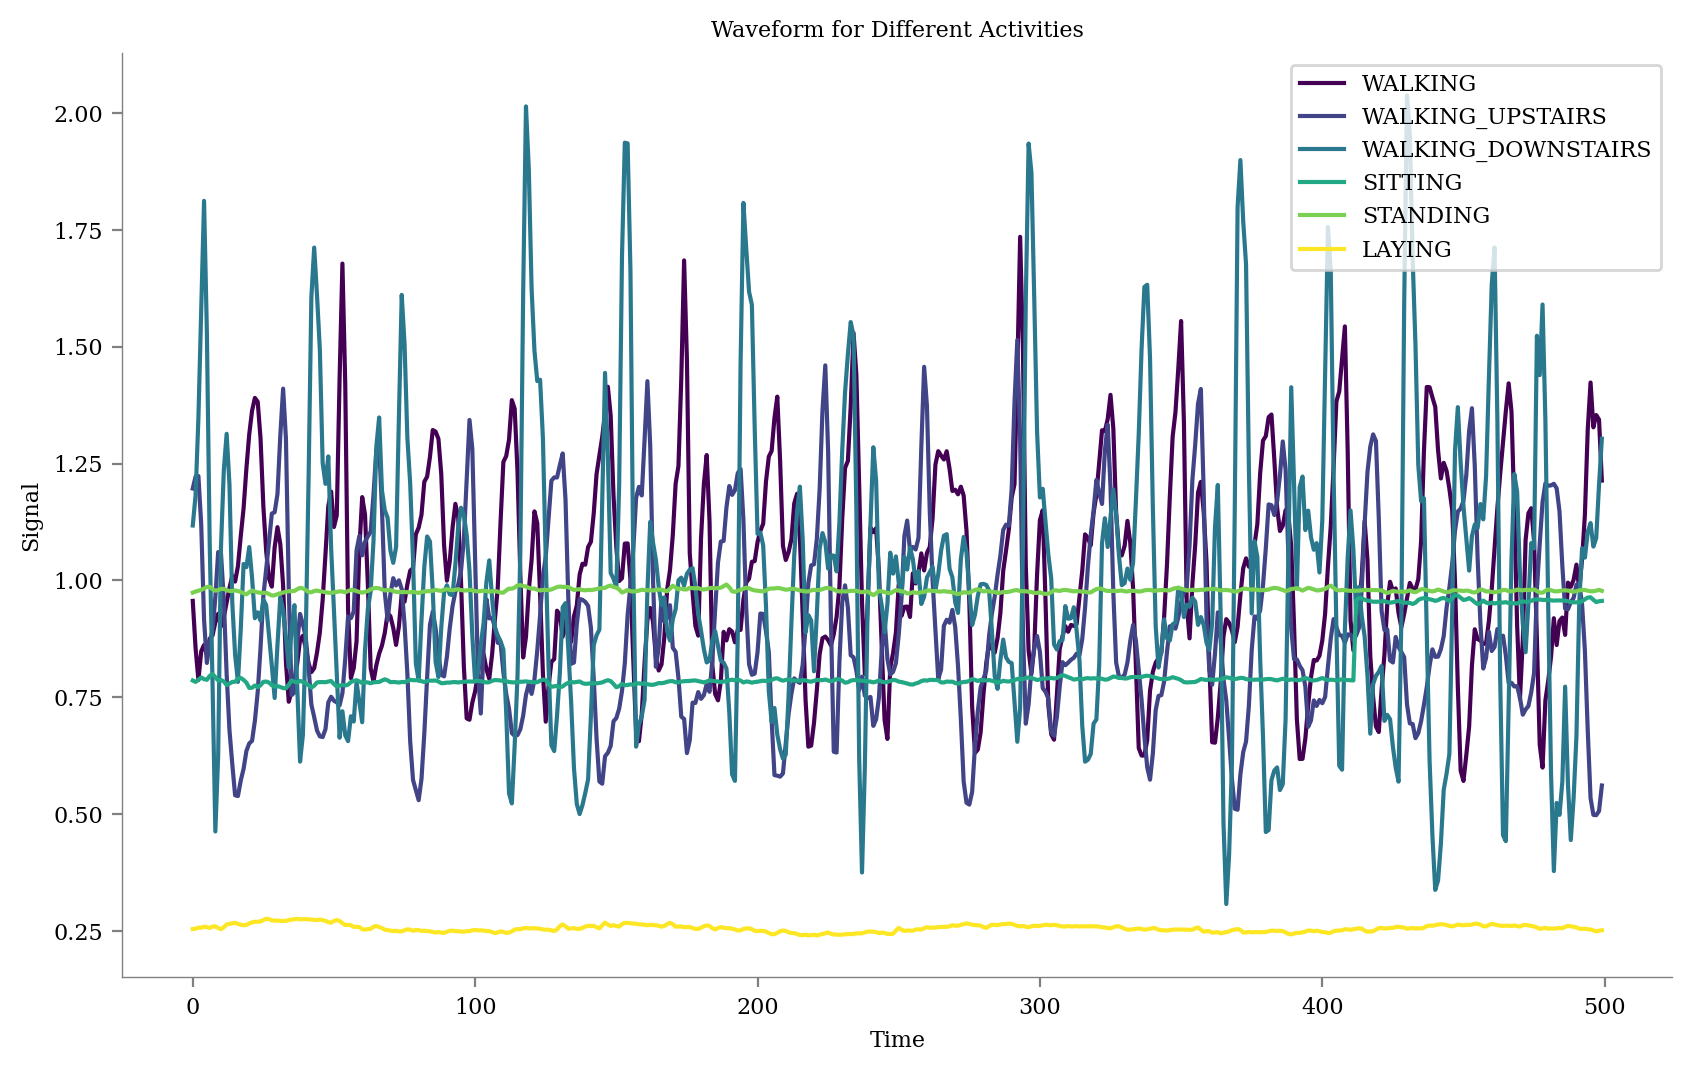

In [13]:
# Use latexify to set up the plot style
latexify()

# Plotting the waveforms for all activities
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(activity_samples)))  # Generate colors

for i, (activity, sample) in enumerate(activity_samples.items()):
    ax.plot(sample[:, 0], color=colors[i], label=activity)  # Plot each activity with a different color

ax.set_title("Waveform for Different Activities")
ax.set_xlabel("Time")
ax.set_ylabel("Signal")
ax.legend(loc='upper right')

# Format the axes
format_axes(ax)


# Save the figure as an image file
plt.savefig('waveforms_for_activities.png', dpi=300, bbox_inches='tight')


plt.show()